# AST 384C - Computational Astrophysics - HW 1
## Carlos Jurado

In [99]:
# Python package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import timeit

# Loading in style file for plots
plt.style.use('/Users/caj3577/Desktop/plotting.mplstyle')

## Problem 1: 
Compute the integral

$$ \int_1^5 = \frac{1}{x^{3/2}} dx$$

with the three methods (Rectangle Rule, Trapezoid Rule, Simposon's Rule) and plot the error in the numerical integral against the step
size ∆x (or number of bins N) for several values of N ∈[5, 1000] for each method. Time
each calculation as well (time.timeit will work well in python). Approximately how
many steps are required to get an answer with a relative error of |I−Iexact|/Iexact < 10−3?
What about 10−5? What did you lean about the trade-off between method, accuracy and
calculation speed? (Note: you can test your implementation against the implementations in
scipy.integrate.)

In [162]:

def integrate_rectangles(func, N, a, b):
    ''' 
    Numerically integrates a function using the Rectangle method

    func - The function to integrate over 
    N - The number of rectangles to compute the total intergral with 
    a - The lower bound of integration 
    b - The upper bound of integration 
    '''
    
    suma = []
    delta_x = (b-a)/N

    for i in range(N):
        i = i + 1 #indexing stars at 0 in python
        x_i = a + (i-1)*delta_x # Computing left endpoint rectangles
        sum_i = func(x_i) * delta_x
        suma.append(sum_i)

    return sum(suma)


def integrate_trapezoids(func, N, a, b):
    ''' 
    Numerically integrates a function using the Trapezoid method

    func - The function to integrate over 
    N - The number of Trapezoid to compute the total intergral with 
    a - The lower bound of integration 
    b - The upper bound of integration 
    '''

    suma = []
    delta_x = (b-a)/N
    x_i1 = a #initialize left edge of trapezoid 


    for i in range(N):
        i = i + 1 #indexing stars at 0 in python
        x_i2 = a + (i)*delta_x
        sum_i = ( func(x_i1) + func(x_i2) )/2 * delta_x
        suma.append(sum_i)
        x_i1 = x_i2

    return sum(suma)
    
    

def integrate_simpson(func, N, a, b):
    ''' 
    Numerically integrates a function using Simpson's Rule.

    func - The function to integrate
    N - The number of subintervals (should be even for Simpson's rule)
    a - Lower bound of integration
    b - Upper bound of integration
    '''

    delta_x = (b - a) / N  # Step size
    sum_even = []
    sum_odd = []


    for i in range(1, N//2, 1):  # Use integer division
        if i%2 != 0: 
            sum_odd.append( func(a + (2*i - 1) * delta_x) )
        if i%2 == 0: 
            sum_even.append( func(a + (2*i) * delta_x) )

    return (delta_x/3) * (func(a) + func(b) + 4*sum(sum_even) + 2*sum(sum_odd))
        


    #return I


In [163]:
def f1(x):
    return (1/x**(3/2))

N_array = np.arange(5, 1000, step = 10)


#Initializing empty list that will hold the value of the integral and the time of completion for the array of step sizes
value_rectangles_arr, value_trapezoids_arr, value_simpsion_arr = [], [], []
time_rectangles_arr, time_trapezoids_arr, time_simpsion_arr = [], [], []

for N in N_array:
    b, a = 1, 5

    time_rectangles = timeit.timeit(lambda: integrate_rectangles(f1, N, b, a), number=1)
    time_rectangles_arr.append(time_rectangles)
    value_rectangles = integrate_rectangles(f1, N, b, a)
    value_rectangles_arr.append(value_rectangles)

    time_trapezoids = timeit.timeit(lambda: integrate_trapezoids(f1, N, b, a), number=1)
    time_trapezoids_arr.append(time_trapezoids)
    value_trapezoids = integrate_trapezoids(f1, N, b, a)
    value_trapezoids_arr.append(value_trapezoids)

    time_simpsion = timeit.timeit(lambda: integrate_simpson(f1, N, b, a), number=1)
    time_simpsion_arr.append(time_simpsion)
    value_simpsion = integrate_simpson(f1, N, b, a)
    value_simpsion_arr.append(value_simpsion)
    


Calculating the integral analytically gives: 

$$ \int_1^5 = \frac{1}{x^{3/2}} = 1.10557$$



In [164]:
## Calculating the relative errors
value_analytical = 1.10557

err_rectangles_arr = ( np.array(value_rectangles_arr) - value_analytical)/value_analytical
err_trapezoids_arr = ( np.array(value_trapezoids_arr) - value_analytical)/value_analytical
err_simpsion_arr = np.abs(( np.array(value_simpsion_arr) - value_analytical)/value_analytical)

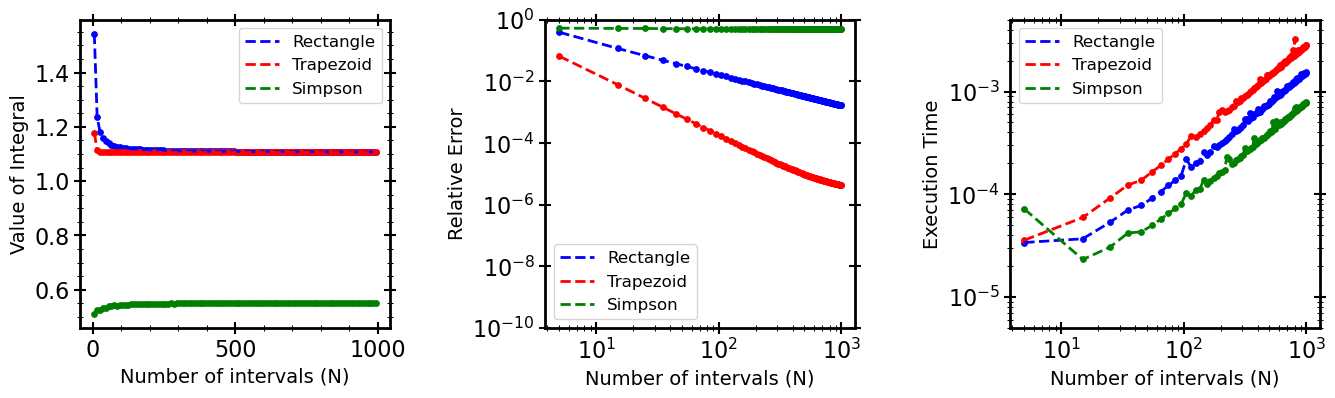

In [165]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

axs[0].scatter(N_array, value_rectangles_arr, color='b', s = 15)
axs[0].plot(N_array, value_rectangles_arr, color='b', linestyle = '--', label='Rectangle')

axs[0].scatter(N_array, value_trapezoids_arr, color='r', s = 15)
axs[0].plot(N_array, value_trapezoids_arr, color='r', linestyle = '--', label='Trapezoid')

axs[0].scatter(N_array, value_simpsion_arr, color='g', s = 15)
axs[0].plot(N_array, value_simpsion_arr, color='g', linestyle = '--', label='Simpson')


axs[0].set_xlabel('Number of intervals (N)')
axs[0].set_ylabel('Value of Integral')
axs[0].legend()

#############################################################################################################
#############################################################################################################
#############################################################################################################


axs[1].scatter(N_array, err_rectangles_arr, color='b', s = 15)
axs[1].loglog(N_array, err_rectangles_arr, color='b', linestyle = '--', label='Rectangle')

axs[1].scatter(N_array, err_trapezoids_arr, color='r', s = 15)
axs[1].loglog(N_array, err_trapezoids_arr, color='r', linestyle = '--', label='Trapezoid')

axs[1].scatter(N_array, err_simpsion_arr, color='g', s = 15)
axs[1].loglog(N_array, err_simpsion_arr, color='g', linestyle = '--', label='Simpson')

axs[1].set_xlabel('Number of intervals (N)')
axs[1].set_ylabel('Relative Error')
axs[1].set_ylim(10**-10, 1)
axs[1].legend()

#############################################################################################################
#############################################################################################################
#############################################################################################################


axs[2].scatter(N_array, time_rectangles_arr, color='b', s = 15)
axs[2].loglog(N_array, time_rectangles_arr, color='b', linestyle = '--', label='Rectangle')

axs[2].scatter(N_array, time_trapezoids_arr, color='r', s = 15)
axs[2].loglog(N_array, time_trapezoids_arr, color='r', linestyle = '--', label='Trapezoid')

axs[2].scatter(N_array, time_simpsion_arr, color='g', s = 15)
axs[2].loglog(N_array, time_simpsion_arr, color='g', linestyle = '--', label='Simpson')


axs[2].set_xlabel('Number of intervals (N)')
axs[2].set_ylabel('Execution Time')
axs[2].set_ylim(5 * 10**-6, 5 * 10**-3)
axs[2].legend()
